In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adadelta

from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7:horse', '8" ship', '9: truck']

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

'6: frog'

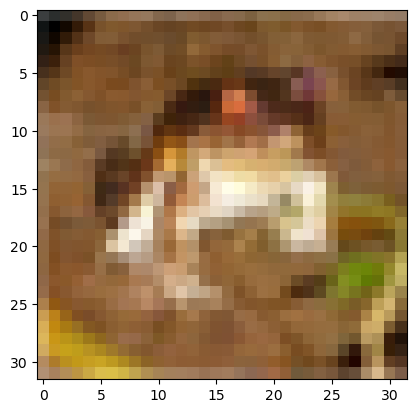

In [6]:
plt.imshow(x_train[0])
class_names[y_train[0][0]]

In [7]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomZoom(
#         height_factor=(-0.05, -0.15),
#         width_factor=(-0.05, -0.15)
#     ),
#     tf.keras.layers.RandomRotation(0.3)
# ])
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=512, activation='relu'))
# model.add(tf.keras.layers.Dense(units=10, activation='softmax'))



In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomZoom(
        height_factor=(-0.05, -0.15),
        width_factor=(-0.05, -0.15)
    ),
    tf.keras.layers.RandomRotation(0.3),
])
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=[32, 32, 3]))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(2,2))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), metrics=['sparse_categorical_accuracy'])
history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
5000/5000 [==============================] - 27s 5ms/step - loss: 2.2267 - sparse_categorical_accuracy: 0.1722 - val_loss: 2.1035 - val_sparse_categorical_accuracy: 0.2180
Epoch 2/100
5000/5000 [==============================] - 25s 5ms/step - loss: 2.0693 - sparse_categorical_accuracy: 0.2438 - val_loss: 2.0298 - val_sparse_categorical_accuracy: 0.2685
Epoch 3/100
5000/5000 [==============================] - 25s 5ms/step - loss: 2.0092 - sparse_categorical_accuracy: 0.2764 - val_loss: 1.9706 - val_sparse_categorical_accuracy: 0.2901
Epoch 4/100
5000/5000 [==============================] - 24s 5ms/step - loss: 1.9486 - sparse_categorical_accuracy: 0.3034 - val_loss: 1.9100 - val_sparse_categorical_accuracy: 0.3075
Epoch 5/100
5000/5000 [==============================] - 25s 5ms/step - loss: 1.8959 - sparse_categorical_accuracy: 0.3203 - val_loss: 1.8596 - val_sparse_categorical_accuracy: 0.3258
Epoch 6/100
5000/5000 [==============================] - 25s 5ms/step - loss: 1.

5000/5000 [==============================] - 24s 5ms/step - loss: 1.4955 - sparse_categorical_accuracy: 0.4674 - val_loss: 1.5855 - val_sparse_categorical_accuracy: 0.4372
Epoch 46/100
5000/5000 [==============================] - 24s 5ms/step - loss: 1.4923 - sparse_categorical_accuracy: 0.4694 - val_loss: 1.6408 - val_sparse_categorical_accuracy: 0.4197
Epoch 47/100
5000/5000 [==============================] - 24s 5ms/step - loss: 1.4851 - sparse_categorical_accuracy: 0.4723 - val_loss: 1.5825 - val_sparse_categorical_accuracy: 0.4383
Epoch 48/100
5000/5000 [==============================] - 23s 5ms/step - loss: 1.4819 - sparse_categorical_accuracy: 0.4726 - val_loss: 1.5629 - val_sparse_categorical_accuracy: 0.4498
Epoch 49/100
5000/5000 [==============================] - 24s 5ms/step - loss: 1.4762 - sparse_categorical_accuracy: 0.4754 - val_loss: 1.5851 - val_sparse_categorical_accuracy: 0.4397
Epoch 50/100
5000/5000 [==============================] - 25s 5ms/step - loss: 1.4733 - 

5000/5000 [==============================] - 24s 5ms/step - loss: 1.3382 - sparse_categorical_accuracy: 0.5260 - val_loss: 1.4558 - val_sparse_categorical_accuracy: 0.4970
Epoch 90/100
5000/5000 [==============================] - 24s 5ms/step - loss: 1.3360 - sparse_categorical_accuracy: 0.5271 - val_loss: 1.5212 - val_sparse_categorical_accuracy: 0.4761
Epoch 91/100
5000/5000 [==============================] - 25s 5ms/step - loss: 1.3328 - sparse_categorical_accuracy: 0.5290 - val_loss: 1.4569 - val_sparse_categorical_accuracy: 0.4915
Epoch 92/100
5000/5000 [==============================] - 24s 5ms/step - loss: 1.3290 - sparse_categorical_accuracy: 0.5324 - val_loss: 1.4641 - val_sparse_categorical_accuracy: 0.4961
Epoch 93/100
5000/5000 [==============================] - 25s 5ms/step - loss: 1.3290 - sparse_categorical_accuracy: 0.5281 - val_loss: 1.4556 - val_sparse_categorical_accuracy: 0.4964
Epoch 94/100
5000/5000 [==============================] - 25s 5ms/step - loss: 1.3226 - 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (10, 32, 32, 3)           0         
_________________________________________________________________
random_zoom (RandomZoom)     (10, 32, 32, 3)           0         
_________________________________________________________________
random_rotation (RandomRotat (10, 32, 32, 3)           0         
_________________________________________________________________
conv2d (Conv2D)              (10, 30, 30, 16)          448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (10, 15, 15, 16)          0         
_________________________________________________________________
dropout (Dropout)            (10, 15, 15, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (10, 13, 13, 32)          4

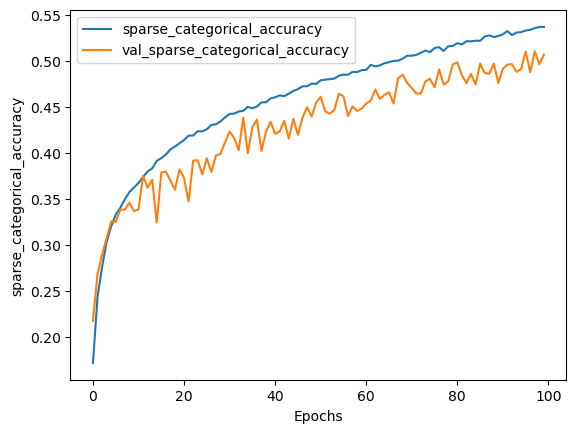

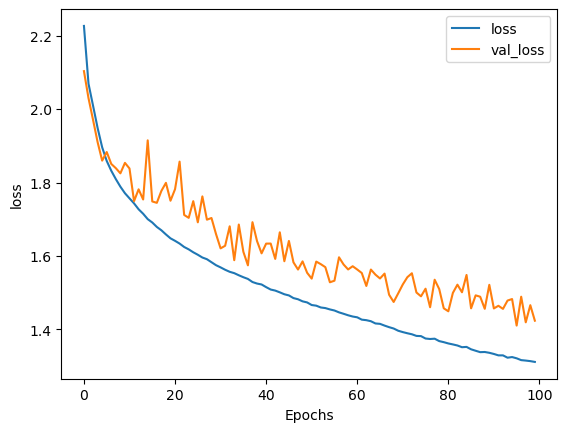

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "sparse_categorical_accuracy")
plot_graphs(history, "loss")

In [12]:
y_pred = model.predict(x_test)
y_classes = np.argmax(y_pred, axis=1)
print(y_classes[101]), print(y_test[101])

7
[5]


(None, None)

In [13]:
import numpy as np
from keras.preprocessing import image
from ipywidgets import FileUpload
from IPython.display import display

path = '/tmp/images/airplane_32.jpg'
img = image.load_img(path, target_size=(32, 32, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
y_pred = model.predict(image_tensor)
y_classes = np.argmax(y_pred, axis=1)
print(y_classes)
print(y_classes[0])
print("Image is an: {}".format(class_names[y_classes[0]]))
    


[0]
0
Image is an: 0: airplane


In [14]:
import numpy as np
from keras.preprocessing import image
from ipywidgets import FileUpload
from IPython.display import display

path = '/tmp/images/dog_32.jpg'
img = image.load_img(path, target_size=(32, 32, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
y_pred = model.predict(image_tensor)
y_classes = np.argmax(y_pred, axis=1)
print(y_classes)
print(y_classes[0])
print("Image is an: {}".format(class_names[y_classes[0]]))
    

[0]
0
Image is an: 0: airplane
